NETFLIX Movies Data Analysis

In [50]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')  
df.head()  

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df['Genre']

0       Action, Adventure, Science Fiction
1                 Crime, Mystery, Thriller
2                                 Thriller
3       Animation, Comedy, Family, Fantasy
4         Action, Adventure, Thriller, War
                       ...                
9822                          Drama, Crime
9823                                Horror
9824             Mystery, Thriller, Horror
9825                 Music, Drama, History
9826           War, Drama, Science Fiction
Name: Genre, Length: 9827, dtype: object

In [8]:
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9822    False
9823    False
9824    False
9825    False
9826    False
Length: 9827, dtype: bool>

Exploration Summery

We have a dataframe consisting of 9827 row and 9 coulmns.
our dataset looks a bit tidy with no NaNs nor duplicated values.
Release_Date column needs to be casted into date time and to extract only the year value
Overview, Original_Languege and Poster-Url wouldn't be so useful during analysis, so we'll drop them.
there is noticable outliers in Popularity column
Vote_Average better be Categorised for proper analysis.
Genre coulmn has comma saperated values and White space thats need to be handled and category . Exploration summery

In [9]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [10]:
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtype

dtype('int32')

In [11]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Droping the Columns don't have need

In [51]:

# df.drop(['Overview', 'Original_Language', 'Poster_Url','Vote_Average_Category'], axis=1, inplace=True)
df.drop(['Overview', 'Original_Language', 'Poster_Url', 'Vote_Average_Category'],
        axis=1, inplace=True, errors='ignore')

df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,Popular,Crime
4,2022-03-01,The Batman,3827.658,1151,Popular,Mystery


Categorizing Vote_Average column


We would cut the Vote_Average values make 4 categories Popular Average below_avg not_popular to describe it more using Categorize_col() function provided above

In [22]:
def categorize_col(df, col, labels):
    
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df
    


In [23]:
labels = ['not_Popular', 'below_Average', 'Average', 'Popular', ]

categorize_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique()

['Popular', 'below_Average', 'Average', 'not_Popular', NaN]
Categories (4, object): ['not_Popular' < 'below_Average' < 'Average' < 'Popular']

In [52]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,Popular,Crime
4,2022-03-01,The Batman,3827.658,1151,Popular,Mystery


In [25]:
df['Vote_Average'].value_counts()


Vote_Average
not_Popular      2467
Popular          2450
Average          2412
below_Average    2398
Name: count, dtype: int64

In [26]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date             0
Title                    0
Overview                 0
Popularity               0
Vote_Count               0
Vote_Average             0
Original_Language        0
Genre                    0
Poster_Url               0
Vote_Average_Category    0
dtype: int64

we'd split genre into a list and then explode our dataframe to have only one genre per row for each movie

In [53]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode("Genre").reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,Popular,Crime
4,2022-03-01,The Batman,3827.658,1151,Popular,Mystery


genre column casting into category

In [28]:
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [29]:
df.nunique()

Release_Date             5846
Title                    9415
Overview                 9722
Popularity               8088
Vote_Count               3265
Vote_Average                4
Original_Language          42
Genre                      19
Poster_Url               9727
Vote_Average_Category       4
dtype: int64

In [54]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,Popular,Crime
4,2022-03-01,The Batman,3827.658,1151,Popular,Mystery


Data Visualization

In [42]:
sns.set_style('whitegrid')

## What is the most frequent genre of movies realeased on Netflix?

In [35]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

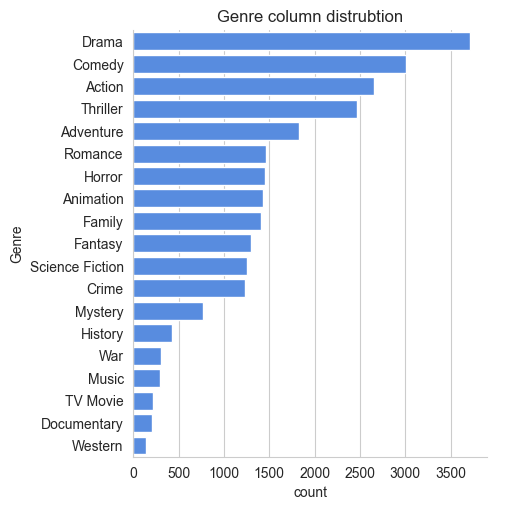

In [43]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index, color= '#4287f5')

plt.title('Genre column distrubtion')
plt.show()

## Which has highest vote in vote avg column?

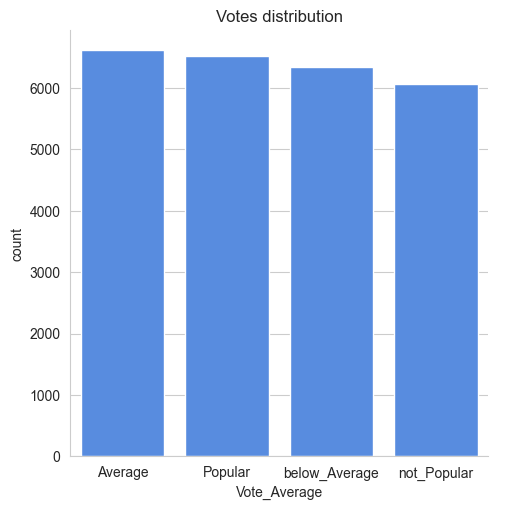

In [46]:
sns.catplot(x = 'Vote_Average', data = df, kind = 'count', 
            order = df['Vote_Average'].value_counts().index, color= '#4287f5') 
plt.title("Votes distribution")

plt.show()

## What movie got the highest Popularity? What's its genre?

In [55]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


## what movie got the Lowest Popularity? What's its genre?

In [56]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021-03-31,The United States vs. Billie Holiday,13.354,152,Average,Music
25547,2021-03-31,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,2021-03-31,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1984-09-23,Threads,13.354,186,Popular,War
25550,1984-09-23,Threads,13.354,186,Popular,Drama
25551,1984-09-23,Threads,13.354,186,Popular,Science Fiction


## Which year has the most filmmed movies?

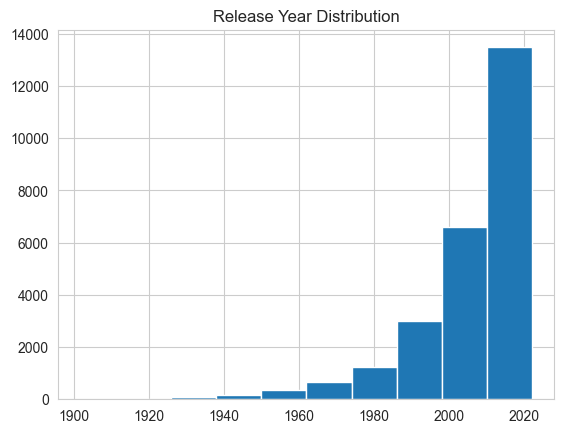

In [ ]:
df['Release_Year'].hist()
plt.title('Release Year Distribution')
plt.show()

